In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
myset = pd.read_csv("insurance.csv")

xVar = myset["bmi"].values
yVar = myset["charges"].values

Part 1: cost function (MSE)

In [8]:
def cost_function(x, y, w, b):
    cost_sum = 0
    for i in range(len(x)):
        cost = ((w * x[i] + b) - y[i]) ** 2
        cost_sum += cost
    
    total_cost = cost_sum * (1/(2*len(x)))
    return total_cost

Part 2: Derivatives of cost

In [9]:
def gradient_function(x,y,w,b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w*x[i] + b

        dc_dw += ((f-y[i])*x[i]) * (1/m)
        dc_db += (f-y[i]) * (1/m)

    return dc_dw, dc_db

Part 3: Descent function to find minimum

In [14]:
def gradient_descent(x,y, alpha, iter):
    w = 0
    b = 0

    for i in range(iter):
        dw, db = gradient_function(x, y, w, b)
        w = w - (alpha * dw)
        b = b -(alpha * db)
        print(f"iteration{i}: cost {cost_function(x, y, w, b)}")
    return w, b

getting slope and intercept values for imported training set

In [33]:
al = .002
it = 10000
final_w, final_b = gradient_descent(xVar, yVar, al, it)

iteration0: cost 153626810.34816253
iteration1: cost 146581809.37272936
iteration2: cost 140133264.76533794
iteration3: cost 134230678.2503576
iteration4: cost 128827826.9291665
iteration5: cost 123882401.31039992
iteration6: cost 119355673.98593056
iteration7: cost 115212196.35801433
iteration8: cost 111419521.04267041
iteration9: cost 107947947.77545573
iteration10: cost 104770290.82982354
iteration11: cost 101861666.12673794
iteration12: cost 99199296.36839639
iteration13: cost 96762332.67007908
iteration14: cost 94531691.2933283
iteration15: cost 92489904.20191962
iteration16: cost 90620982.27033576
iteration17: cost 88910290.07353279
iteration18: cost 87344431.2774856
iteration19: cost 85911143.73300686
iteration20: cost 84599203.45132317
iteration21: cost 83398336.70944718
iteration22: cost 82299139.59704366
iteration23: cost 81293004.37476788
iteration24: cost 80372052.06738421
iteration25: cost 79529070.76381335
iteration26: cost 78757459.14093086
iteration27: cost 78051174.768

411.18366800110266 641.177448560647


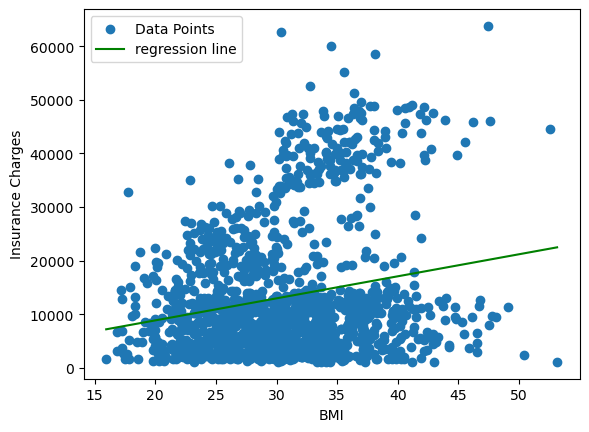

In [35]:
print(final_w, final_b)

plt.scatter(xVar, yVar, label = 'Data Points')

x_vals = np.linspace(min(xVar), max(xVar), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color = 'green', label = 'regression line')

plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.legend()
plt.show()